# How dense a sampling would we need?

This is to work out how dense a sampling would we need if we did not use any interpolation tricks. The Earth-Moon system is not particularly challenging in this regard, so we choose the Mars/Phobos system - Phobos orbits pretty close to mars and very fast.

We set up a computationally simple epicyclic system and take samples spaced at particular distances and check visually how it looks when we 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# Some constants in km
Earth_orbit_r = 149597870
Earth_r = 6371
Moon_orbit_r = 385000
Moon_r = 1737

Mars_orbit_r = 227939200
Mars_r = 3389.5
Phobos_orbit_r = 9376
Phobos_r = 11.2

In [35]:
def run_sim(N = 100000):
    d_km = 1000
    domega_mars = d_km / Mars_orbit_r
    domega_phobos = domega_mars * (686.971 / 0.318)
    
    mars_x = np.empty(N, dtype=float)
    mars_y = np.empty(N, dtype=float)
    phobos_x = np.empty(N, dtype=float)
    phobos_y = np.empty(N, dtype=float)
    for n in range(N):
        mars_x[n] = np.sin(2*np.pi*domega_mars*n)
        mars_y[n] = np.cos(2*np.pi*domega_mars*n)
        phobos_x[n] = np.sin(2*np.pi*domega_phobos*n)
        phobos_y[n] = np.cos(2*np.pi*domega_phobos*n)

    mars_x *= Mars_orbit_r
    mars_y *= Mars_orbit_r
    phobos_x *= Phobos_orbit_r
    phobos_y *= Phobos_orbit_r

    phobos_x += mars_x
    phobos_y += mars_y
    
    return mars_x, mars_y, phobos_x, phobos_y    

In [40]:
from matplotlib.patches import Circle
def plot(mars_x, mars_y, phobos_x, phobos_y):
    plt.plot(mars_x, mars_y, 'o-', ms=1)
    plt.plot(phobos_x, phobos_y, 'o-', ms=1)
    plt.axis('scaled')
    
    n = 20
    
    circle = Circle((mars_x[n], mars_y[n]), Mars_r, ec="none")
    plt.gca().add_artist(circle)

    circle = Circle((phobos_x[n], phobos_y[n]), Phobos_r, ec="none")
    plt.gca().add_artist(circle)


[0, 187520, 227934512.0, 227953264.0]

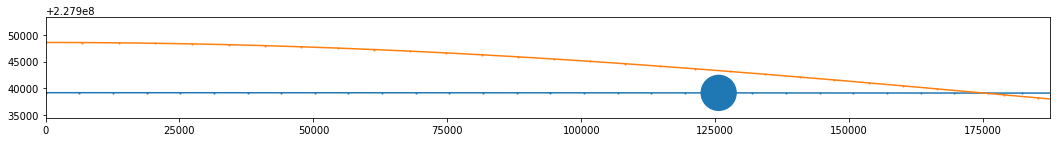

In [41]:
fig=plt.figure(figsize=(18, 16))
plot(*run_sim())
plt.axis('scaled')
plt.axis([0, 20*Phobos_orbit_r, Mars_orbit_r - .5* Phobos_orbit_r, Mars_orbit_r + 1.5 * Phobos_orbit_r])


Orbital speed of Pluto = 4.67 km/s. In 1 year pluto covers 147373992 km -> 147373 points per year

We have 9 planets and 181 moons = 190 orrery objects.

Per year, roughly 190 * 147373 points = 28,001,058. At 3 * 4 = 12 bytes per position we have 336,012,701 = 336 MB per year.

